In [1]:
import numpy as np
import os
import torch
from PIL import Image, ImageDraw
import json

In [2]:
with open(os.path.join('./', 'TRAIN' + '_images.json'), 'r') as f:
    images = json.load(f)

with open(os.path.join('./', 'TRAIN' + '_objects.json'), 'r') as f:
    objects = json.load(f)

In [3]:
image = Image.open(images[0], mode='r').convert('RGB')

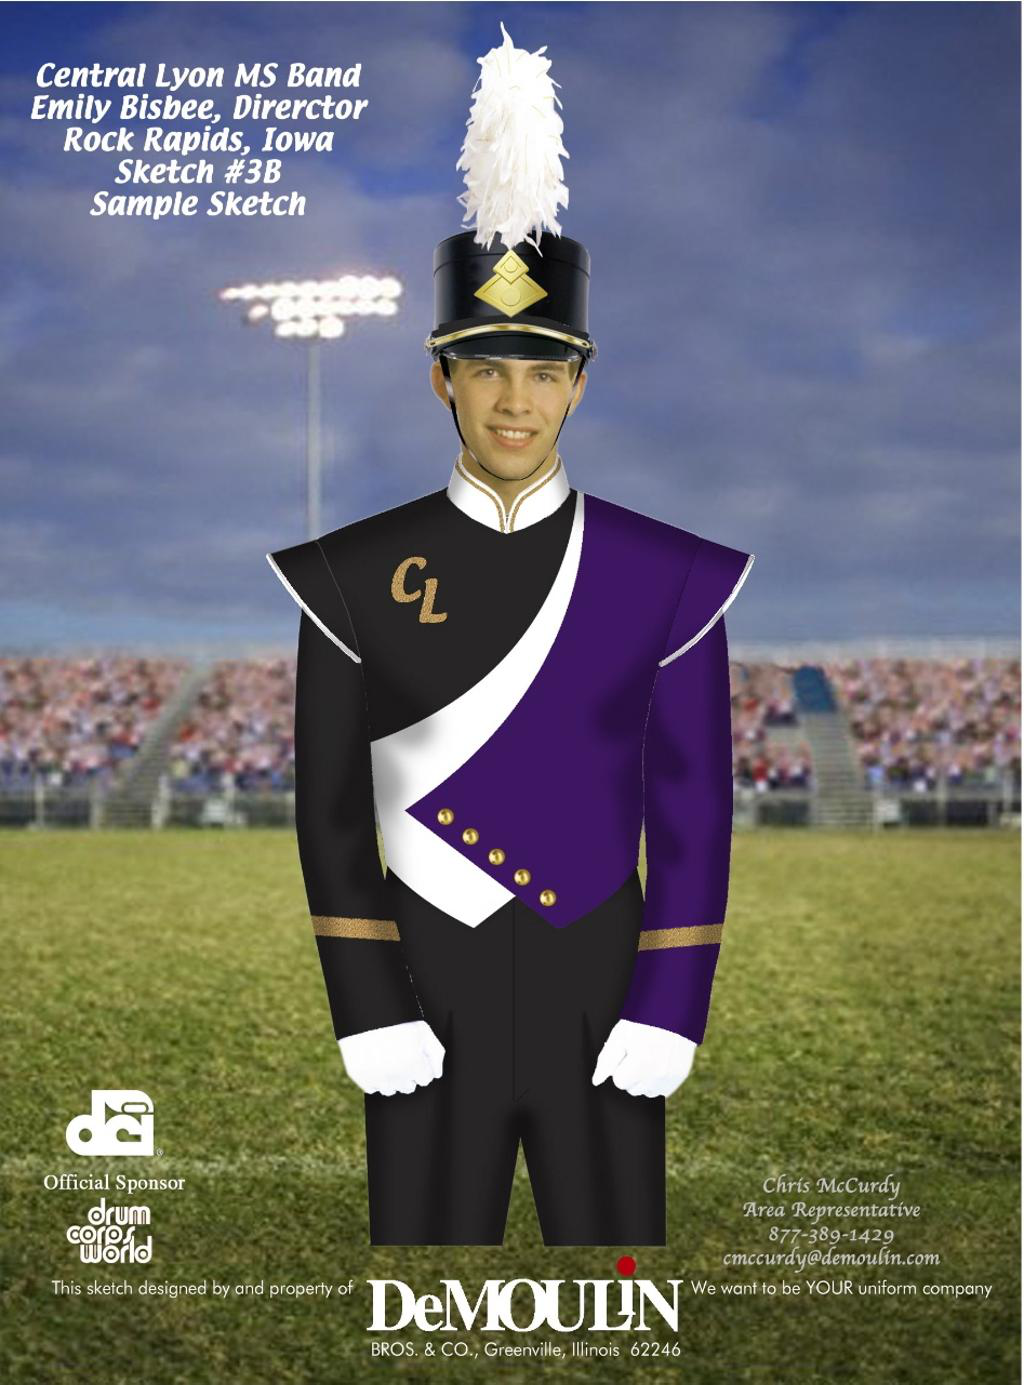

In [4]:
image

In [5]:
bbox = objects[0]['boxes']
labels = objects[0]['labels']

In [6]:
def draw_bbox(image, boxes):
    """image: a PIL image"""
    """boxes: list of (n, 4)"""
    draw = ImageDraw.Draw(image)
    for i in range(len(boxes)):
        draw.rectangle((boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]), outline='red', width=5)
    del draw

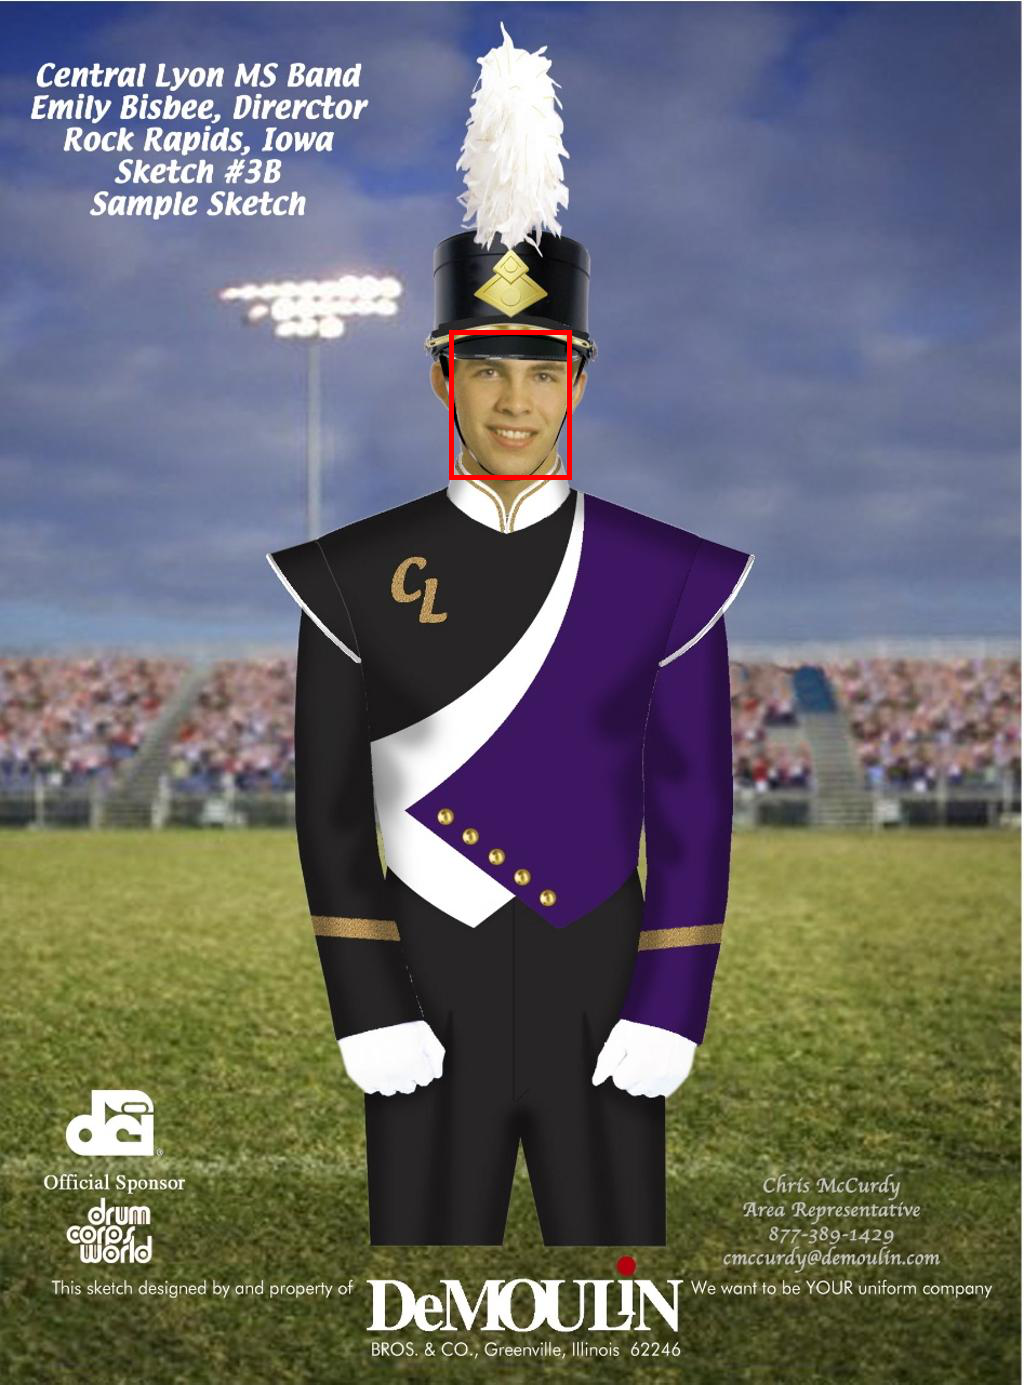

In [40]:
draw_bbox(image,bbox)
image

In [7]:
import utils
import torchvision.transforms.functional as FT
import random

In [8]:
image = Image.open(images[0], mode='r').convert('RGB')
image = utils.photometric_distort(image)

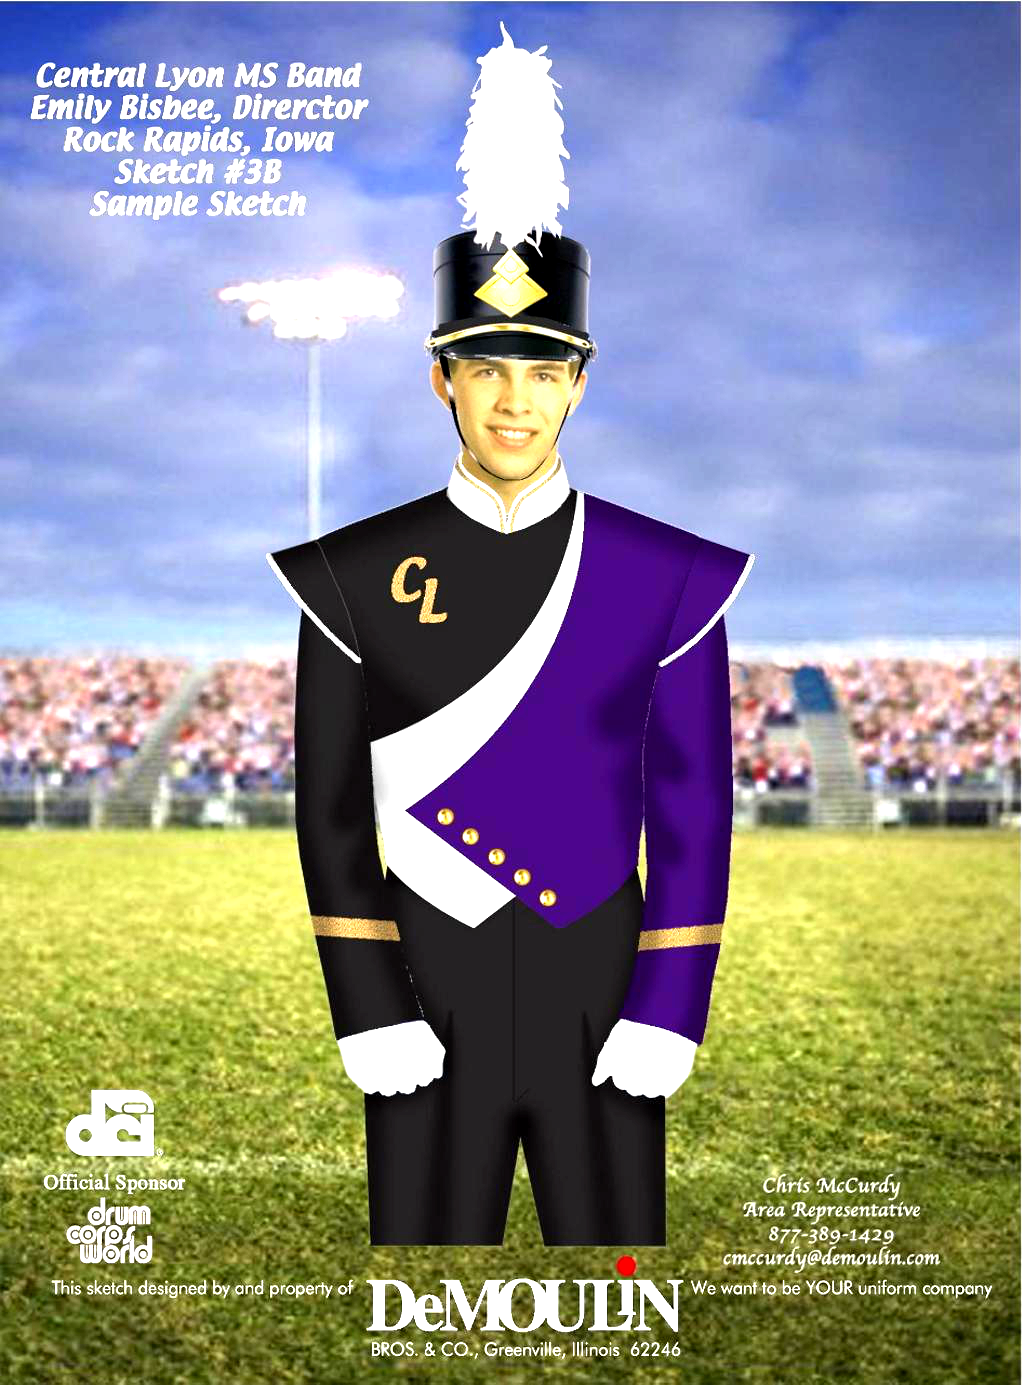

In [9]:
image

In [8]:
print(image.size)

(1024, 1385)


In [11]:
mean = [0.485, 0.456, 0.406]
image = FT.to_tensor(image)

In [9]:
boxes = torch.FloatTensor(bbox)
labels = torch.LongTensor(labels)

In [10]:
boxes

tensor([[449., 330., 571., 479.]])

In [11]:
labels

tensor([1])

In [38]:
new_image, new_boxes = utils.expand(image, boxes, filler=mean)

In [39]:
new_image.shape

torch.Size([3, 5072, 3750])

In [42]:
new_boxes

tensor([[2596., 2996., 2718., 3145.]])

In [40]:
new_image = FT.to_pil_image(new_image)

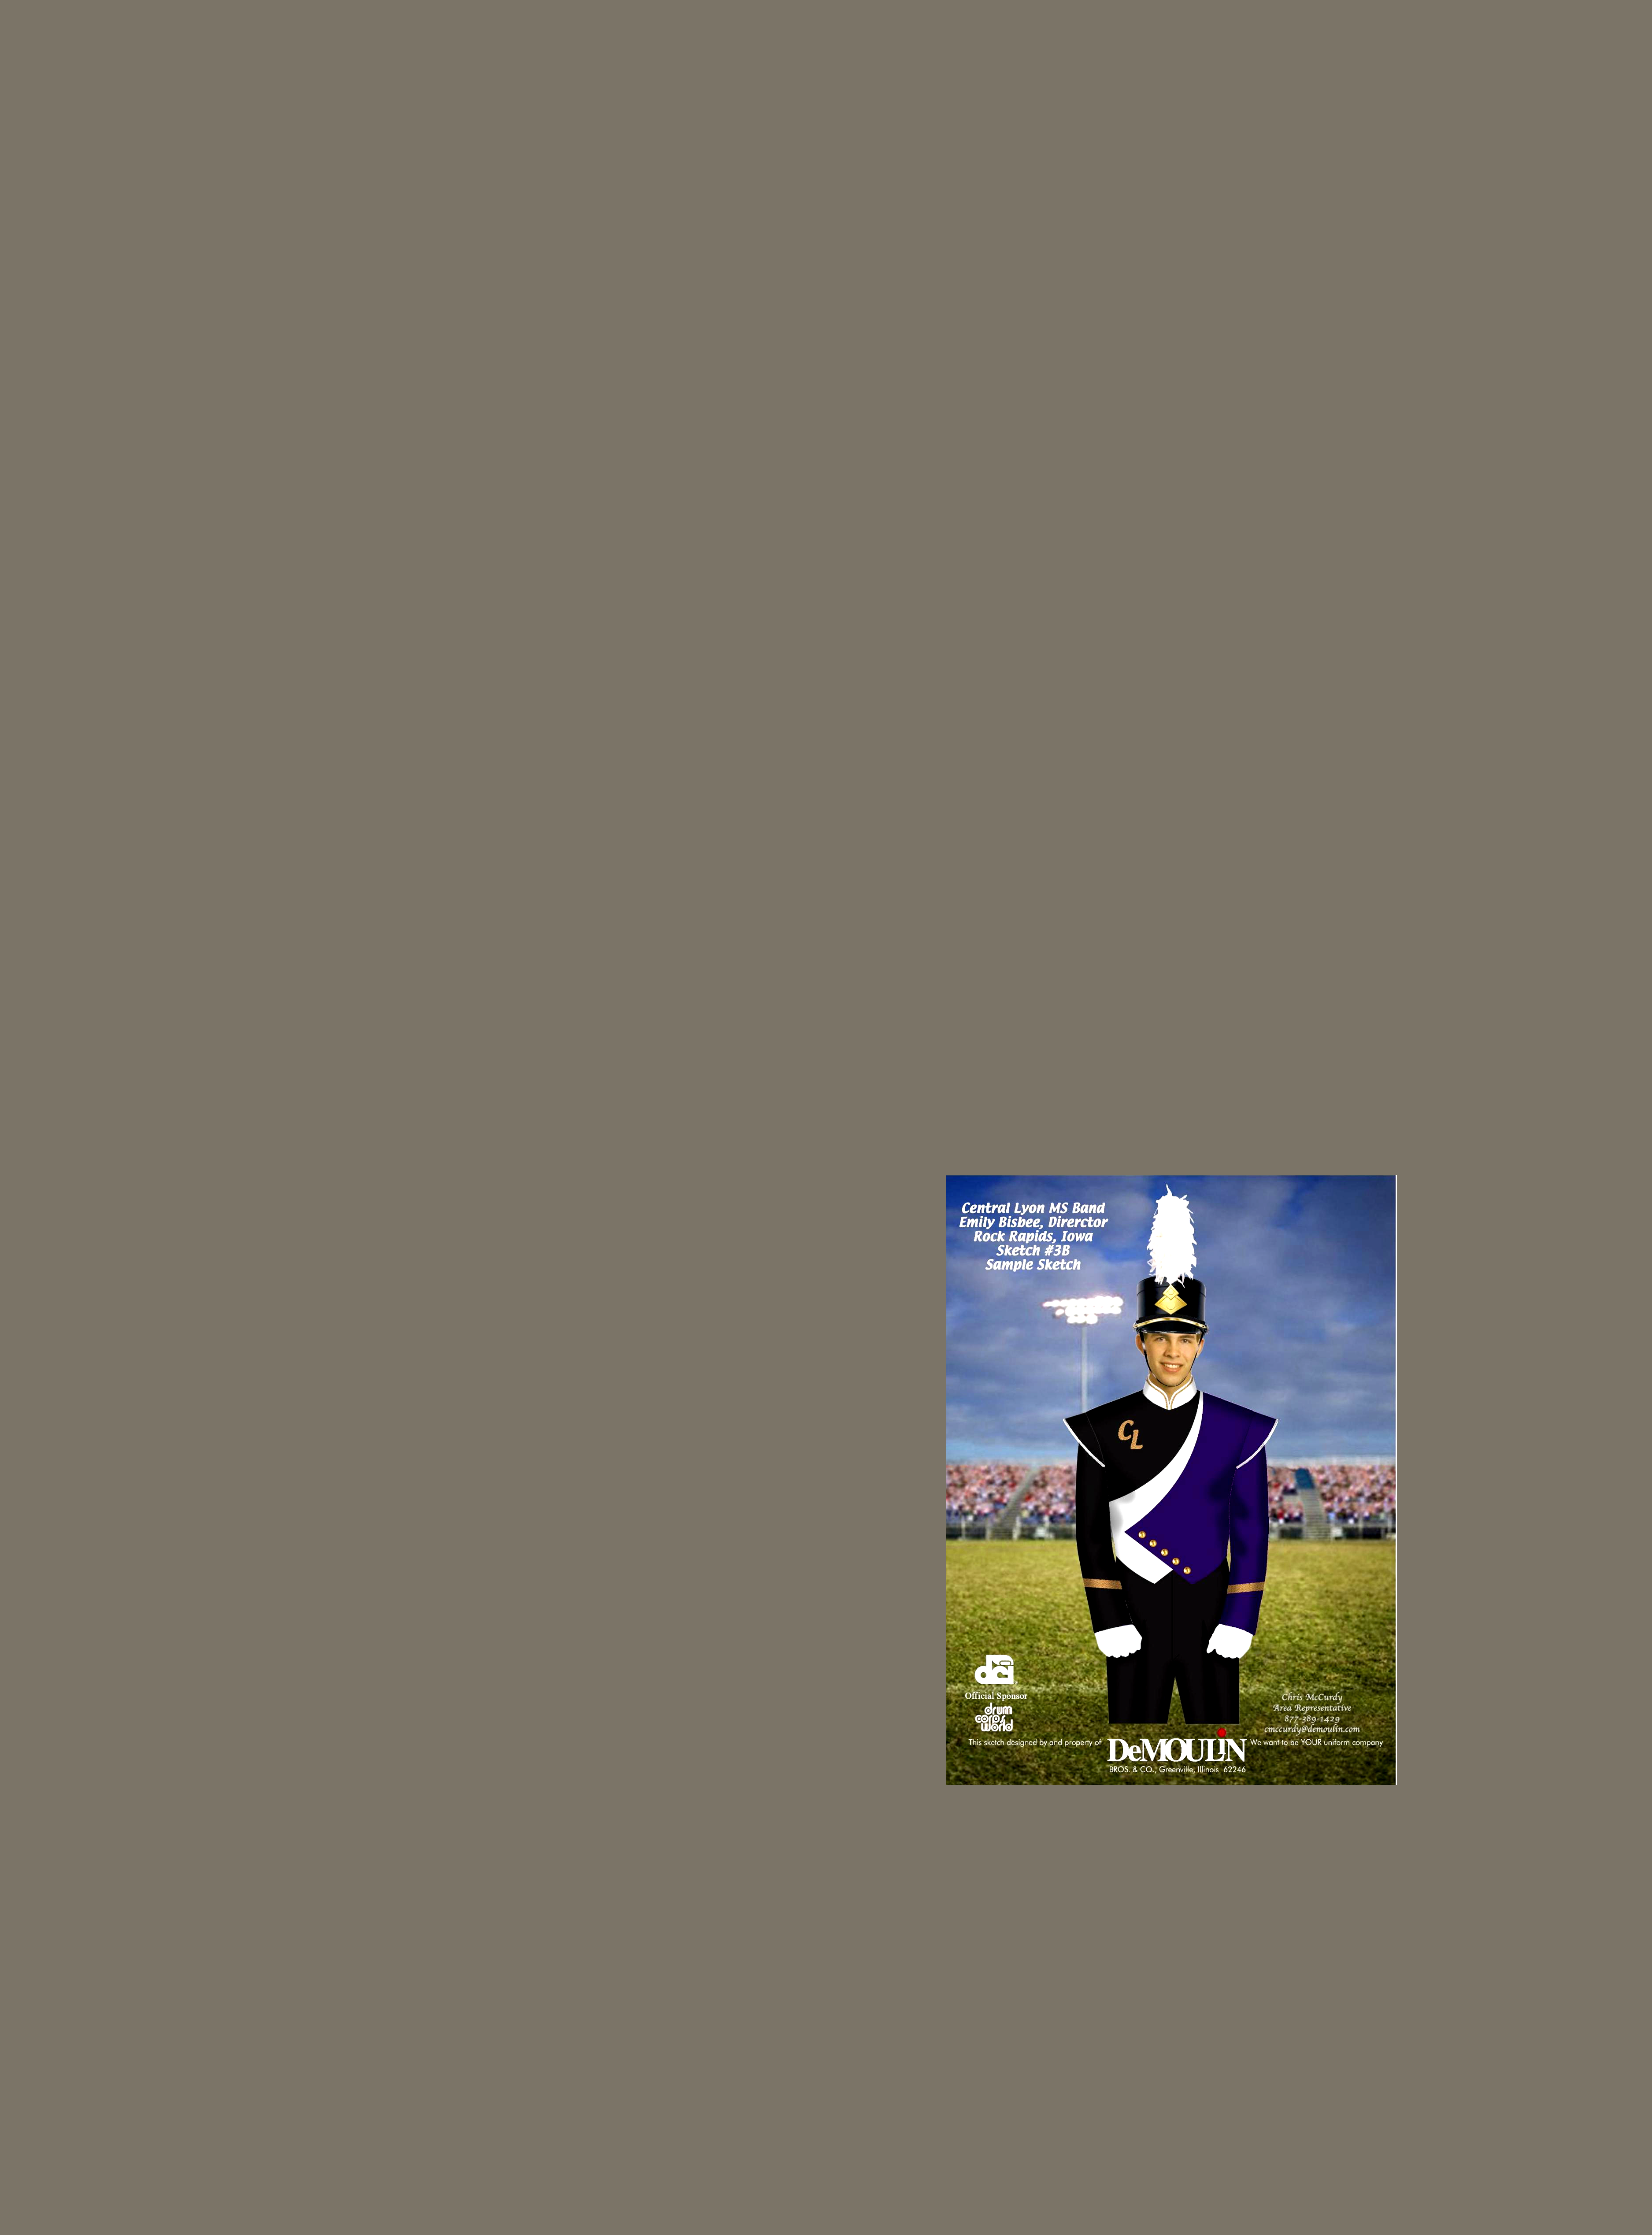

In [41]:
new_image

In [49]:
draw_bbox(new_image, new_boxes.numpy().tolist())

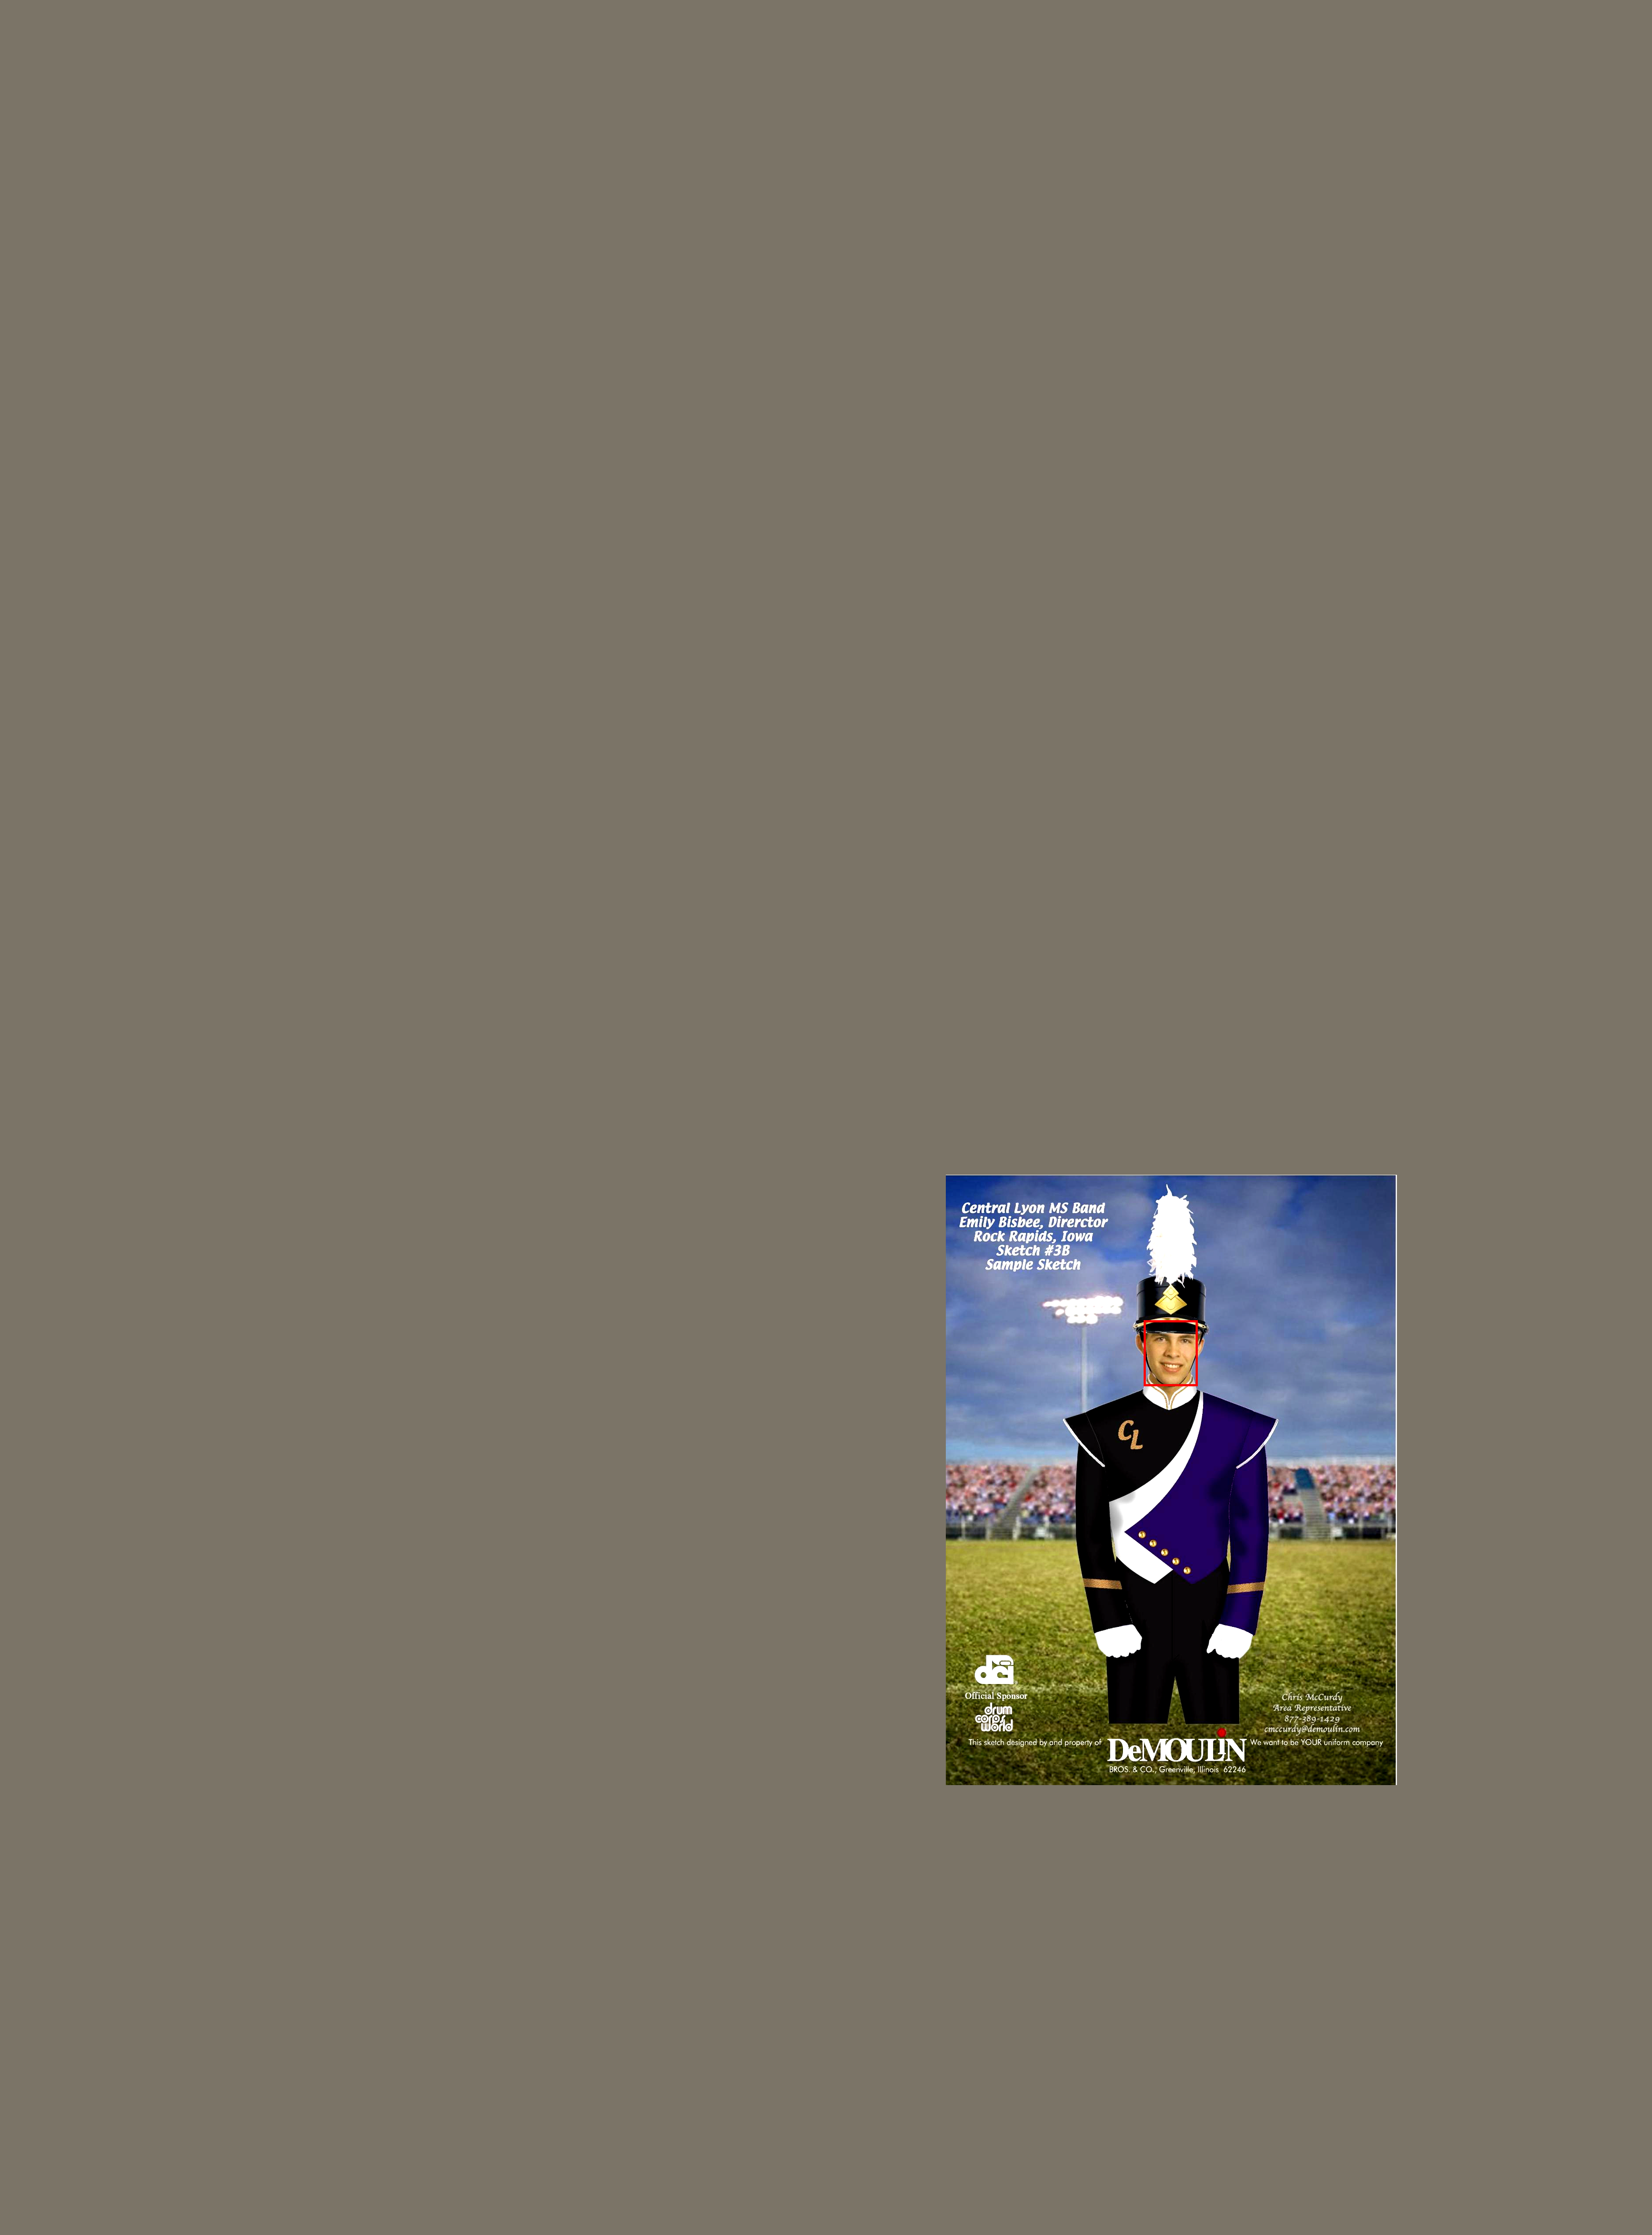

In [50]:
new_image

In [14]:
new_image, new_boxes, new_labels = utils.random_crop(image, boxes, labels)

In [15]:
new_image.shape

torch.Size([3, 519, 878])

In [16]:
new_image = FT.to_pil_image(new_image)

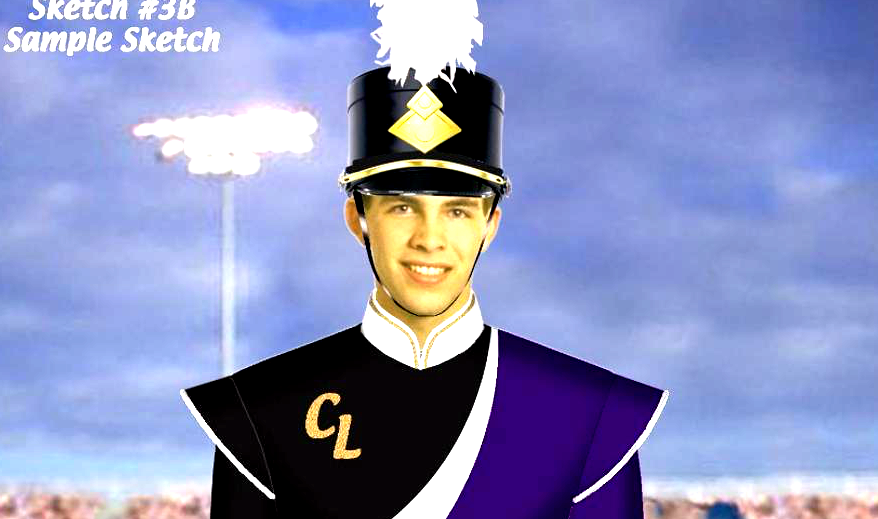

In [17]:
new_image

In [18]:
draw_bbox(new_image, new_boxes.numpy().tolist())

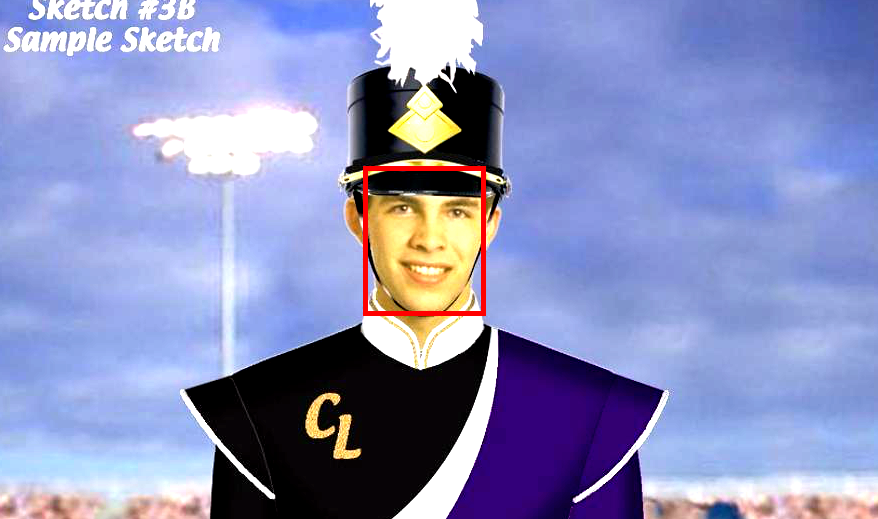

In [19]:
new_image

In [12]:
image, boxes, labels = utils.transform(image, boxes, labels, 'TRAIN')

In [13]:
image.shape

torch.Size([3, 300, 300])

In [14]:
boxes

tensor([[0.6667, 0.0784, 0.9679, 0.4323]])

In [15]:
boxes_100 = boxes * 300

In [16]:
boxes_100

tensor([[200.0000,  23.5154, 290.3704, 129.6912]])

In [17]:
labels

tensor([1])

In [18]:
image_pil = FT.to_pil_image(image)

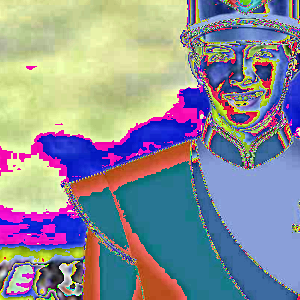

In [19]:
image_pil

In [20]:
image_pil.size

(300, 300)

In [21]:
image[1,:,:]

tensor([[-0.1099, -0.1099, -0.1099,  ..., -0.2850, -0.0924,  0.0651],
        [-0.0924, -0.0924, -0.0924,  ..., -0.2675, -0.0749,  0.0651],
        [-0.0924, -0.0924, -0.0924,  ..., -0.2500, -0.0749,  0.0826],
        ...,
        [-0.1099, -0.1275, -0.1800,  ...,  2.1835,  2.0959,  2.0434],
        [-0.0574, -0.1099, -0.1450,  ...,  2.1660,  2.0959,  2.0084],
        [-0.0049, -0.0749, -0.1099,  ...,  2.1310,  2.0784,  2.1310]])

In [22]:
draw_bbox(image_pil, boxes_100.numpy().tolist())

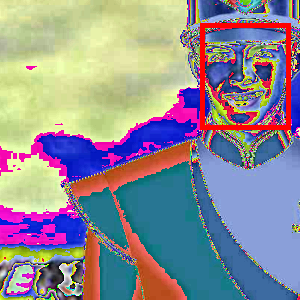

In [23]:
image_pil

In [1]:
import s3fd

In [2]:
s3fdNet = s3fd.build_s3fd('train', num_classes=2)

In [3]:
print(s3fdNet)

S3FD(
  (vgg): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (17): Conv2d(256,

In [34]:
from torch import nn
import torch
import torch.nn.functional as F
import torchvision

In [14]:
net = nn.ModuleList([nn.Linear(784, 256), nn.ReLU()])
net.append(nn.Linear(256, 10)) # # 类似List的append操作
net.append(nn.ReLU(inplace=True))
print(net[-1])  # 类似List的索引访问
print(net)

ReLU(inplace)
ModuleList(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): ReLU(inplace)
)


In [15]:
x = torch.ones((784))
for k in range(3):
    print(net[k])
    x = net[k](x)

Linear(in_features=784, out_features=256, bias=True)
ReLU()
Linear(in_features=256, out_features=10, bias=True)


In [12]:
x

tensor([ 0.0322, -0.1513, -0.1312, -0.0954,  0.2326, -0.1382, -0.0618, -0.1532,
        -0.1428, -0.0104], grad_fn=<AddBackward0>)

In [16]:
from layers import l2norm

In [26]:
L2Norm3_3 = l2norm.L2Norm(256, 10)

In [31]:
x = torch.randn((1, 3, 640, 640))

In [ ]:
out = F.batch_norm()

In [29]:
net = nn.Sequential(nn.BatchNorm2d(3))

In [32]:
y = net(x)
y

tensor([[[[-0.1898, -0.0528,  0.0296,  ..., -0.2120, -0.0102, -0.0194],
          [-0.0332, -0.1632, -0.1388,  ...,  0.0069,  0.0658, -0.0107],
          [ 0.1938, -0.0565, -0.1159,  ..., -0.0009, -0.1565,  0.0452],
          ...,
          [-0.1065,  0.1960, -0.1527,  ..., -0.1423, -0.1941, -0.0412],
          [-0.1282, -0.2070, -0.1173,  ..., -0.0269,  0.1680, -0.0279],
          [-0.1758, -0.0750, -0.0402,  ..., -0.0017,  0.1857, -0.1889]],

         [[ 0.1408, -0.0097,  0.2319,  ...,  0.1738, -0.0852, -0.0814],
          [ 0.0482,  0.0800, -0.1680,  ..., -0.1153, -0.1963,  0.0702],
          [-0.0190, -0.1193, -0.0109,  ...,  0.1276,  0.1360,  0.0607],
          ...,
          [ 0.0331,  0.0165, -0.0398,  ...,  0.1630, -0.0014, -0.1120],
          [-0.1122, -0.0767,  0.0875,  ...,  0.2205,  0.0462,  0.0145],
          [-0.0091,  0.0031,  0.1197,  ...,  0.1849,  0.0514, -0.0010]],

         [[ 0.0871,  0.0254, -0.1189,  ..., -0.1054, -0.0922,  0.0505],
          [-0.0691,  0.0620, -

In [33]:
y2 = F.batch_norm(x)
y2

TypeError: batch_norm() missing 2 required positional arguments: 'running_mean' and 'running_var'

In [35]:
state_dict = torchvision.models.vgg16(pretrained=True).state_dict()

In [38]:
list(state_dict.keys())

['features.0.weight',
 'features.0.bias',
 'features.2.weight',
 'features.2.bias',
 'features.5.weight',
 'features.5.bias',
 'features.7.weight',
 'features.7.bias',
 'features.10.weight',
 'features.10.bias',
 'features.12.weight',
 'features.12.bias',
 'features.14.weight',
 'features.14.bias',
 'features.17.weight',
 'features.17.bias',
 'features.19.weight',
 'features.19.bias',
 'features.21.weight',
 'features.21.bias',
 'features.24.weight',
 'features.24.bias',
 'features.26.weight',
 'features.26.bias',
 'features.28.weight',
 'features.28.bias',
 'classifier.0.weight',
 'classifier.0.bias',
 'classifier.3.weight',
 'classifier.3.bias',
 'classifier.6.weight',
 'classifier.6.bias']

In [1]:
import model

In [2]:
vgg_base = model.VGGBase()


Loaded base model.



In [3]:
s_d = vgg_base.state_dict()
param_names = list(s_d.keys())

In [4]:
param_names

['conv1_1.weight',
 'conv1_1.bias',
 'conv1_2.weight',
 'conv1_2.bias',
 'conv2_1.weight',
 'conv2_1.bias',
 'conv2_2.weight',
 'conv2_2.bias',
 'conv3_1.weight',
 'conv3_1.bias',
 'conv3_2.weight',
 'conv3_2.bias',
 'conv3_3.weight',
 'conv3_3.bias',
 'conv4_1.weight',
 'conv4_1.bias',
 'conv4_2.weight',
 'conv4_2.bias',
 'conv4_3.weight',
 'conv4_3.bias',
 'conv5_1.weight',
 'conv5_1.bias',
 'conv5_2.weight',
 'conv5_2.bias',
 'conv5_3.weight',
 'conv5_3.bias',
 'conv_fc6.weight',
 'conv_fc6.bias',
 'conv_fc7.weight',
 'conv_fc7.bias']

In [43]:
for param in param_names[: -4]:
    print(param)

conv1_1.weight
conv1_1.bias
conv1_2.weight
conv1_2.bias
conv2_1.weight
conv2_1.bias
conv2_2.weight
conv2_2.bias
conv3_1.weight
conv3_1.bias
conv3_2.weight
conv3_2.bias
conv3_3.weight
conv3_3.bias
conv4_1.weight
conv4_1.bias
conv4_2.weight
conv4_2.bias
conv4_3.weight
conv4_3.bias
conv5_1.weight
conv5_1.bias
conv5_2.weight
conv5_2.bias
conv5_3.weight
conv5_3.bias
